In [7]:
from sklearn.cluster import KMeans
import numpy as np
from Wind.Config import wind_data_path
import matplotlib.pyplot as plt
import seaborn as sn

In [8]:
wind_data_path

'/home/bejar/storage/Data/Wind/Data/'

In [88]:
data = np.load(wind_data_path+'10-5000-12.npy')
print(data.shape)
wind = data[:, 0]
date = data[:, 4]
date2 = data[:, 5]

wind = wind.reshape(-1, 6)
date = date.reshape(-1, 24)
date = date[:, 0]

date2 = date2.reshape(-1, 24)
date2 = date2[:, 0]



(61368, 8)


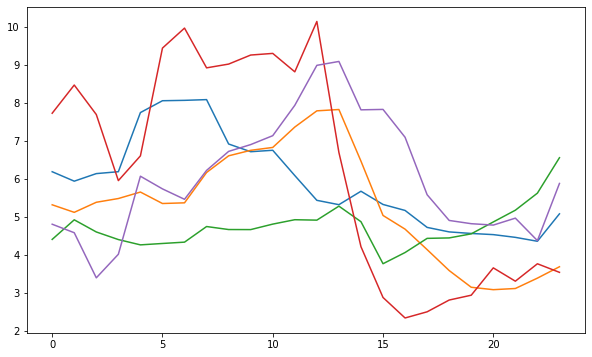

In [49]:

fig = plt.figure(figsize=(10,6))
for i in range(5):
    plt.plot(wind[i,:])


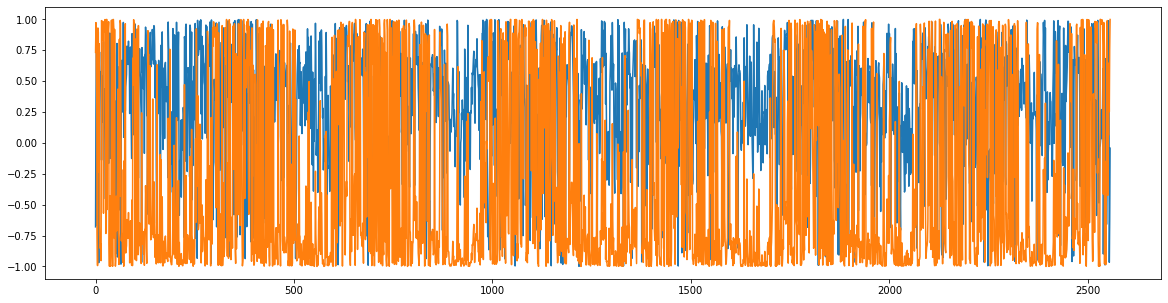

In [48]:

from scipy.spatial.distance import euclidean
dist = np.zeros(wind.shape[0]-1)

for i in range(dist.shape[0]):
    dist[i] = euclidean(wind[i,:], wind[i+1,:])
    

fig = plt.figure(figsize=(20,5))
# plt.plot(dist);
plt.plot(date);
plt.plot(date2);


In [53]:
nc = 50
kmeans = KMeans(n_clusters=nc)
labels = kmeans.fit_predict(wind)


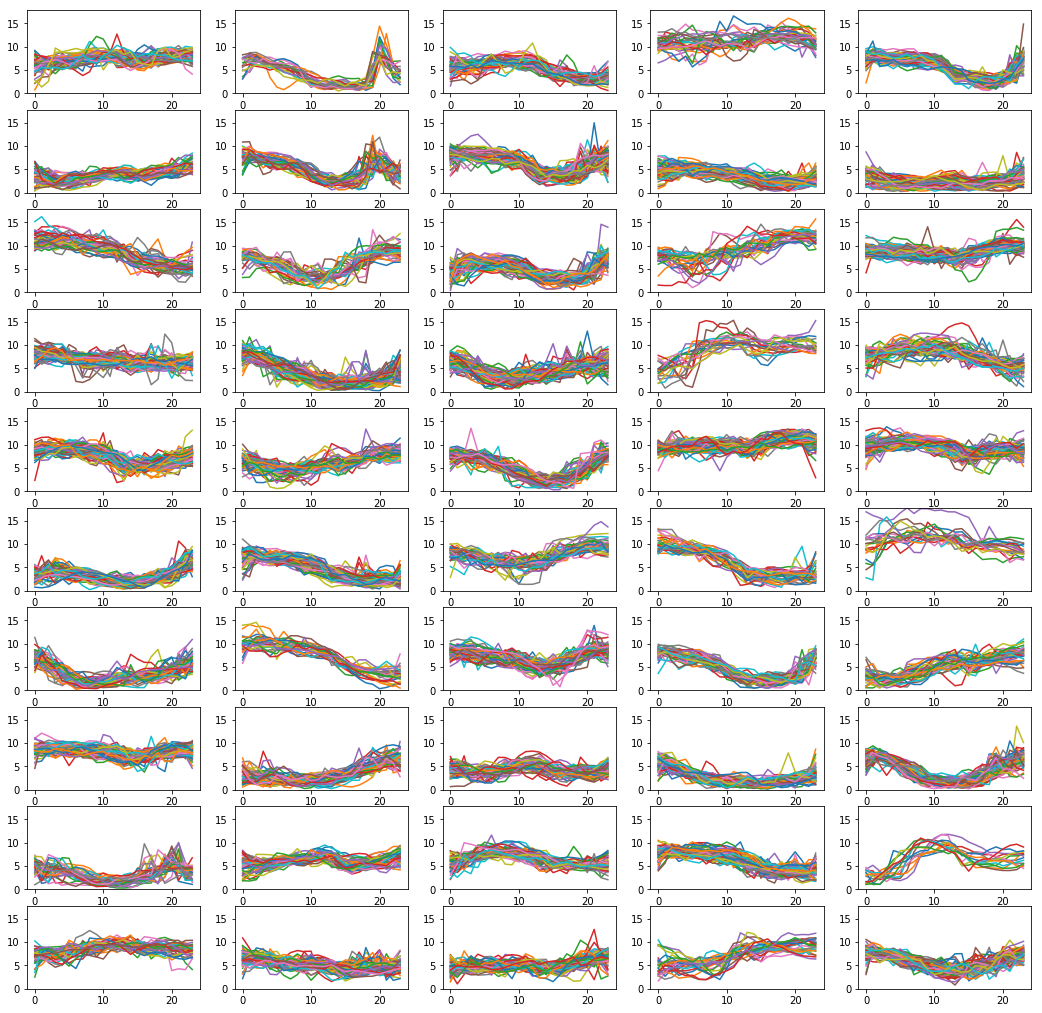

In [54]:
nf =10
fig = plt.figure(figsize=(18,18))
vlab = np.array(labels)
for i in range(nc):
    ax = fig.add_subplot(nf, nc//nf, i + 1)
    ax.plot(wind[vlab==i].T)
    ax.set_ylim([0,np.max(wind)])
plt.show();

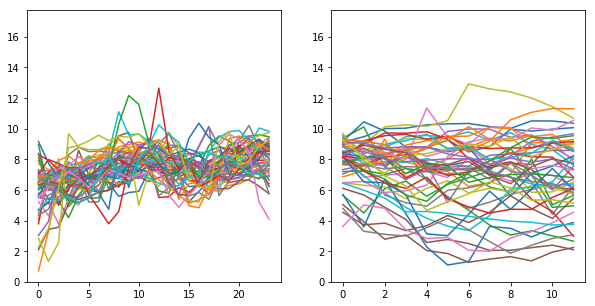

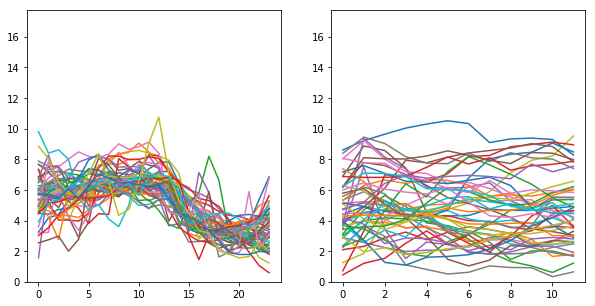

In [59]:
lseries = np.where(vlab==0)[0]

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.set_ylim([0,np.max(wind)])
ax2.set_ylim([0,np.max(wind)])

for i in lseries:
    ax1.plot(wind[i])
    if i+1<wind.shape[0]:
        ax2.plot(wind[i+1,:12])
plt.show();

lseries = np.where(vlab==2)[0]

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.set_ylim([0,np.max(wind)])
ax2.set_ylim([0,np.max(wind)])

for i in lseries:
    ax1.plot(wind[i])
    if i+1<wind.shape[0]:
        ax2.plot(wind[i+1,:12])
plt.show();

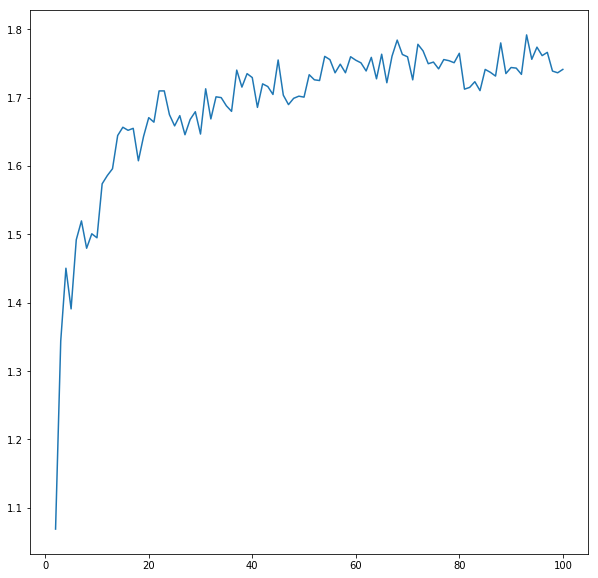

In [62]:
from sklearn.metrics import adjusted_mutual_info_score, silhouette_score, calinski_harabaz_score, davies_bouldin_score 
import warnings
warnings.filterwarnings("ignore")

lscores = []
nclusters = 100
for nc in range(2,nclusters+1):
    km = KMeans(n_clusters=nc, n_init=10, random_state=0)
    labels = km.fit_predict(wind)
    lscores.append(
        davies_bouldin_score(wind, labels))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
plt.plot(range(2,nclusters+1), lscores);
       
        

<IPython.core.display.Javascript object>


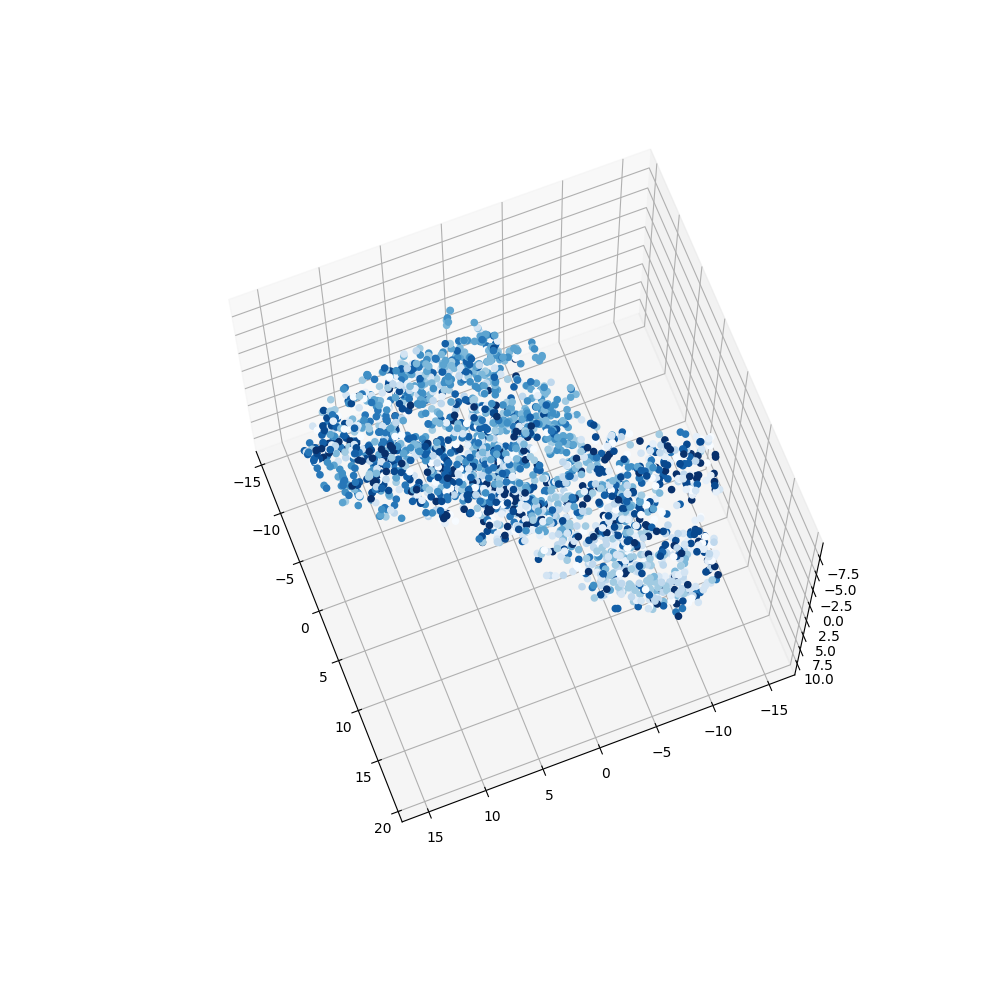

In [63]:
%matplotlib notebook
from sklearn.decomposition import KernelPCA, PCA
from sklearn.manifold import LocallyLinearEmbedding, Isomap, TSNE
from mpl_toolkits.mplot3d import Axes3D

pca = PCA()
pca = LocallyLinearEmbedding(n_components=2,n_neighbors=20)
pca= TSNE(n_components=3)
pdata = pca.fit_transform(wind)

fig = plt.figure(figsize=(10,10))
# ax = fig.add_subplot(111)
# ax.scatter(pdata[:, 0], pdata[:, 1], c=date, cmap=plt.get_cmap("Blues"));

ax = fig.add_subplot(111, projection='3d')
ax.scatter(pdata[:, 0], pdata[:, 1], pdata[:, 2], depthshade=False, c=date, cmap=plt.get_cmap("Blues"));


<IPython.core.display.Javascript object>


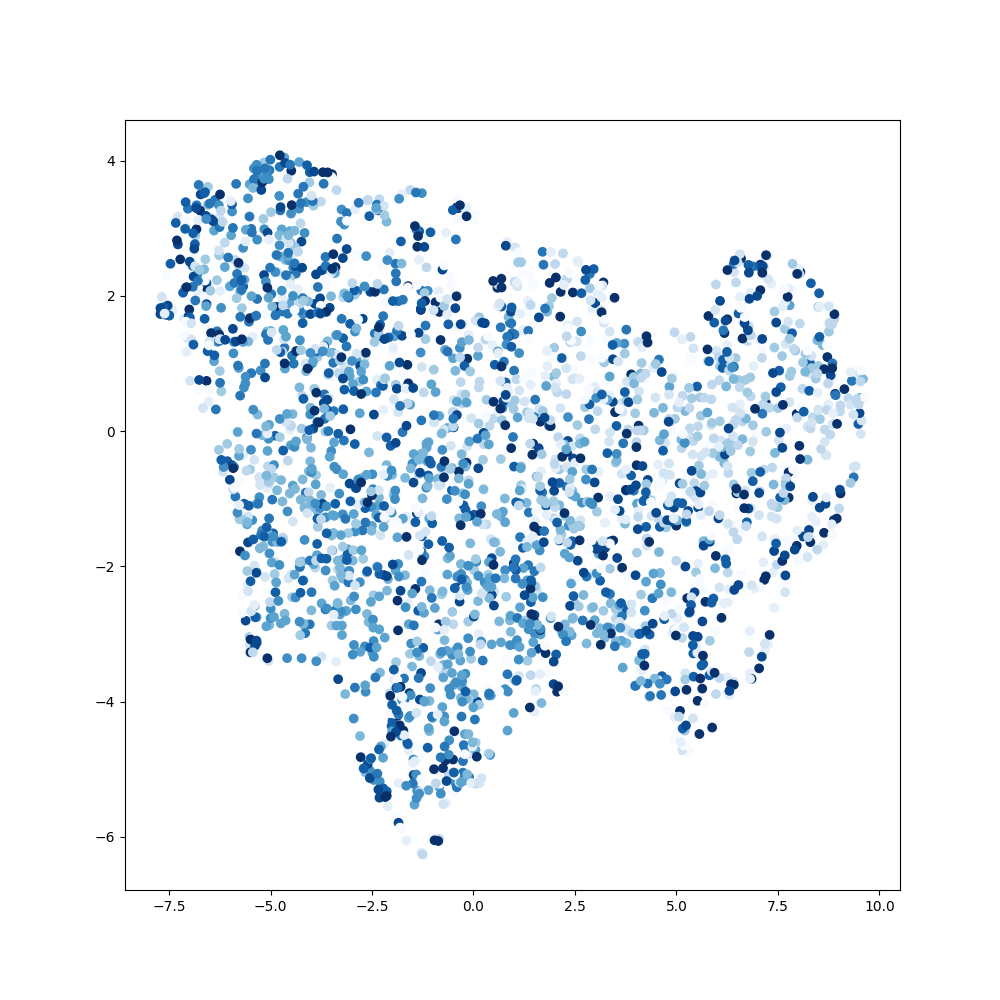

In [64]:
import umap
u = umap.UMAP(n_neighbors=5,
                     min_dist=0.3,
                     metric='euclidean').fit_transform(wind)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
plt.scatter(u[:,0], u[:,1], c=date, cmap=plt.get_cmap("Blues"));



# SSA

In [50]:
from Wind.Util.SSA import SSA

In [173]:
data = np.load(wind_data_path+'10-5000-12.npy')
print(data.shape)
wind = data[:, 0]

wind = wind.reshape(-1, 12)

(61368, 8)


In [174]:
ncomp= 3
nrec = ncomp-1
tssa = SSA(ncomp)

In [175]:
ddata = wind[3,:]
tssa.fit(ddata)
ddata

array([7.78997668, 7.82484269, 6.4647073 , 5.03429723, 4.67364999,
       4.13449361, 3.58287291, 3.14263582, 3.07904327, 3.11004688,
       3.38317893, 3.68318152])

In [176]:
decomp = tssa.decomposition(range(ncomp))

In [177]:

rec = tssa.reconstruct(nrec+1)

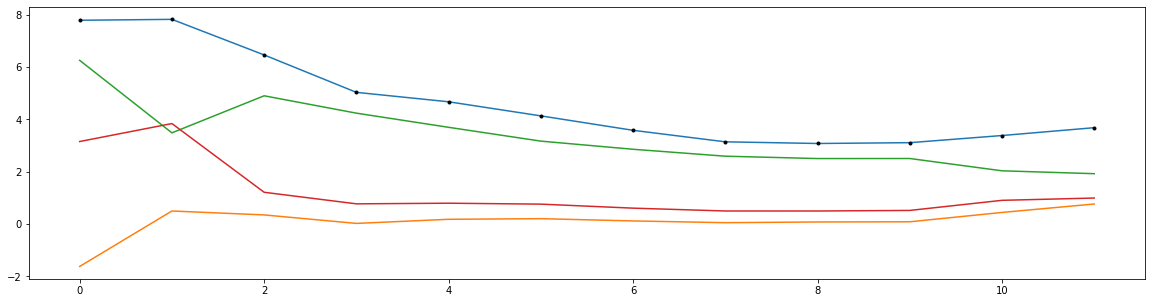

In [178]:
fig = plt.figure(figsize=(20,5))
plt.plot(ddata);
for d in decomp:
    plt.plot(d);
plt.plot(rec,'k.');
